## MILP Approach for Small Instances

fixed cost first echelon vehicles - 100  
fixed cost second echelon vehicles - 50

In [ ]:
import pandas as pd

instance = 'A1'

data = pd.read_excel("Data\Instances\Small_Instances.xlsx", sheet_name=instance, index_col=0)
data = data[['X', 'Y']]

solution_variables = pd.read_excel(f'solution({instance}).xlsx', index_col=0)

In [2]:
data.head()

,X,Y
Number,,
1,47.416821,53.807242
2,13.439768,8.259892
3,35.115685,44.278523
4,17.539752,23.700627
5,37.094541,19.816419


In [3]:
solution_variables.head()

,value
"R_ij_t[1,5,1]",1.0
"R_ij_t[2,4,2]",1.0
"R_ij_t[3,1,1]",1.0
"R_ij_t[4,6,2]",1.0
"R_ij_t[5,3,1]",1.0


In [ ]:
def route_plot(data, solution_variables, instance):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 10))

    # plot depots [1, 2]
    # square shape, opacity 0.5
    plt.scatter(data['X'][1], data['Y'][1], color='blue', label='Depot', s=400, marker='s', alpha = 0.5)
    plt.scatter(data['X'][2], data['Y'][2], color='orange', label='Depot', s=400, marker='s', alpha = 0.5)

    # plot satellites [3, 4, 5, 6] (3, 5 belong to LSP 1, 4, 6 belong to LSP 2)
    plt.scatter(data['X'][3], data['Y'][3], color='blue', label='Satellite', s=400, marker='^', alpha = 0.8)
    plt.scatter(data['X'][4], data['Y'][4], color='orange', label='Satellite', s=400, marker='^', alpha = 0.8)
    plt.scatter(data['X'][5], data['Y'][5], color='blue', label='Satellite', s=400, marker='^', alpha = 0.8)
    plt.scatter(data['X'][6], data['Y'][6], color='orange', label='Satellite', s=400, marker='^', alpha = 0.8)

    # plot customers [7-18] (even numbers belong to LSP 1, odd numbers belong to LSP 2) (colour according to LSP)
    for i in range(7, 19):
        if i % 2 == 0:
            plt.scatter(data['X'][i], data['Y'][i], color='blue', label='Customer', s=200, alpha = 0.5)
        else:
            plt.scatter(data['X'][i], data['Y'][i], color='orange', label='Customer', s=200, alpha = 0.5)

    # plot collaboration points [19, 20] as green diamonds
    plt.scatter(data['X'][19], data['Y'][19], color='green', label='Collaboration Point', s=200, marker='D')
    plt.scatter(data['X'][20], data['Y'][20], color='green', label='Collaboration Point', s=200, marker='D')

    # plt.scatter(data['X'], data['Y'], color='blue')
    for i in data.index:
        plt.annotate(i, (data['X'][i], data['Y'][i]), color='black')

    # first-echelon
    for variable_name in solution_variables.index:
        if variable_name[0] == 'R':
            point_a = int(variable_name[7])
            point_b = int(variable_name[9])
            if point_a % 2 != 0:

                plt.arrow(data['X'][point_a], 
                        data['Y'][point_a], 
                        data['X'][point_b] - data['X'][point_a], 
                        data['Y'][point_b] - data['Y'][point_a], 
                        color='purple',
                        head_width=0.35,
                        lw = 2)

            else:
                plt.arrow(data['X'][point_a],
                        data['Y'][point_a],
                        data['X'][point_b] - data['X'][point_a], 
                        data['Y'][point_b] - data['Y'][point_a], 
                        color='red',
                        head_width=0.35,
                        lw = 2)
            
    # second-echelon
    for variable_name in solution_variables.index:
        if variable_name[0] == 'X':
            point_a = int(variable_name.split(',')[0].split('[')[-1])
            point_b = int(variable_name.split(',')[1])
            vehicle = int(variable_name.split(',')[2][0])
            vehicle_colour_map = {3:'magenta', 4:'turquoise', 5:'green', 6:'black'}
            plt.arrow(data['X'][point_a], 
                    data['Y'][point_a], 
                    data['X'][point_b] - data['X'][point_a], 
                    data['Y'][point_b] - data['Y'][point_a], 
                    color= vehicle_colour_map[vehicle],
                    head_width=0.35)
            
    legend_entries = [
        plt.Line2D([0], [0], color='red', marker='s', markersize=10, label='Depot'),
        plt.Line2D([0], [0], color='red', marker='^', markersize=10, label='Satellite'),
        plt.Line2D([0], [0], color='red', marker='o', markersize=10, label='Customer'),
        plt.Line2D([0], [0], color='red', marker='D', markersize=10, label='Collaboration Point'),
        # add points for LSPs without any coordinates on the plot
        plt.Line2D([0], [0], color='blue', marker='o', markersize=10, label='LSP 1'),
        plt.Line2D([0], [0], color='orange', marker='o', markersize=10, label='LSP 2'),
    ]
    # add legend mentioning that squares are depots, triangles are satellites, circles are customers, and diamonds are collaboration points, arrows are routes, and colours are according to LSPs
    plt.legend(handles=legend_entries)
    plt.savefig(f'route_plot({instance}).png')

## Proposed Approach (Collaboration Points)

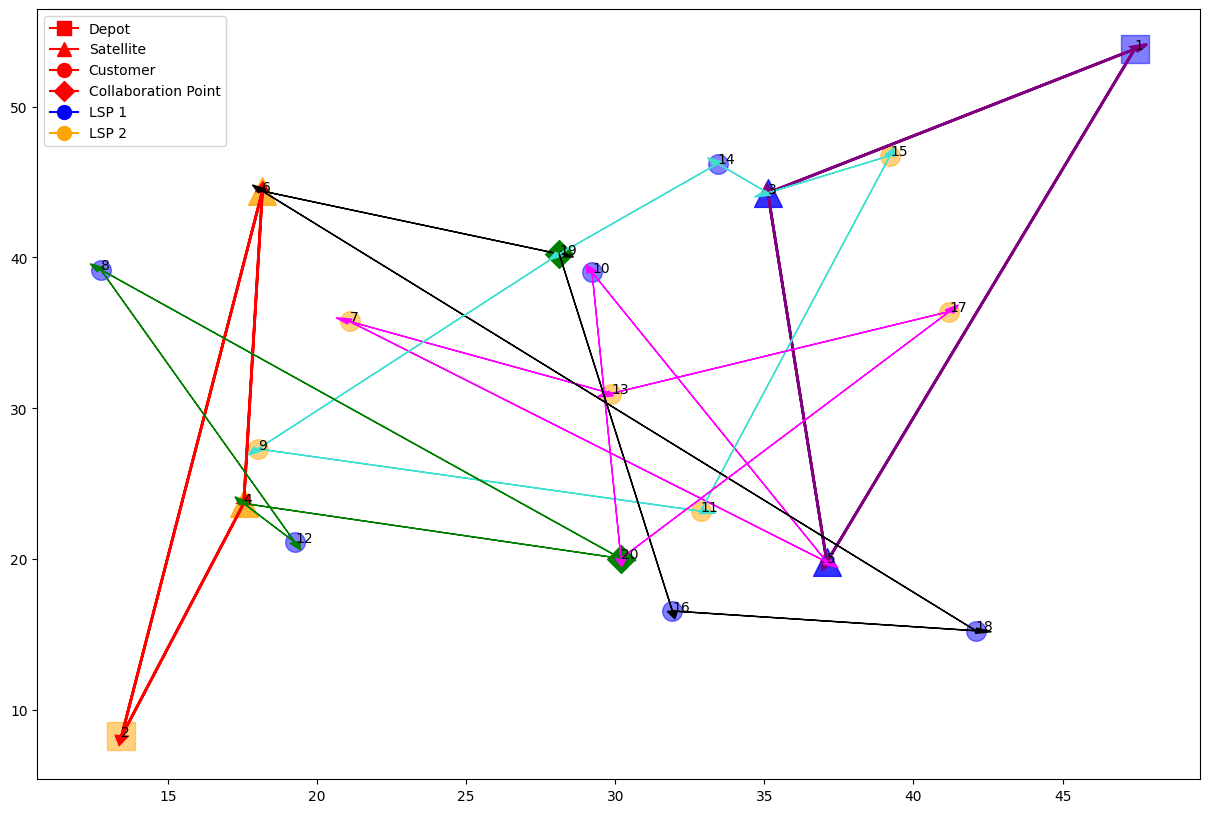

In [31]:
route_plot(data, solution_variables)

After removing SE14 and SE21 constraints and adding this constraint - 
```python
for s in S:
    m.addConstr(gp.quicksum((gp.quicksum(H_ij_v[s, j, v] for j in CUO)) for v in V) <= A_s[s], name = f'Useless1_s_{s}')
```

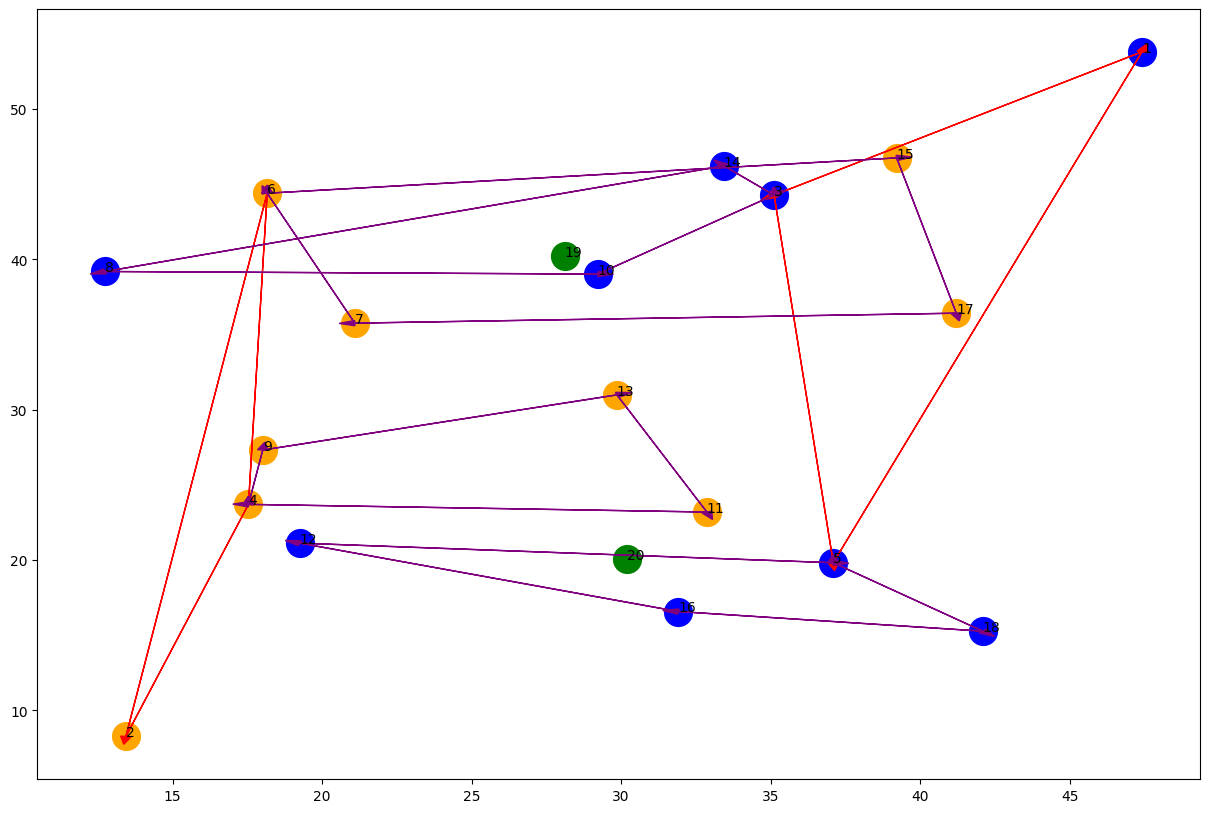

Results obtained on using the formulation in the paper (collaboration points are not visited)

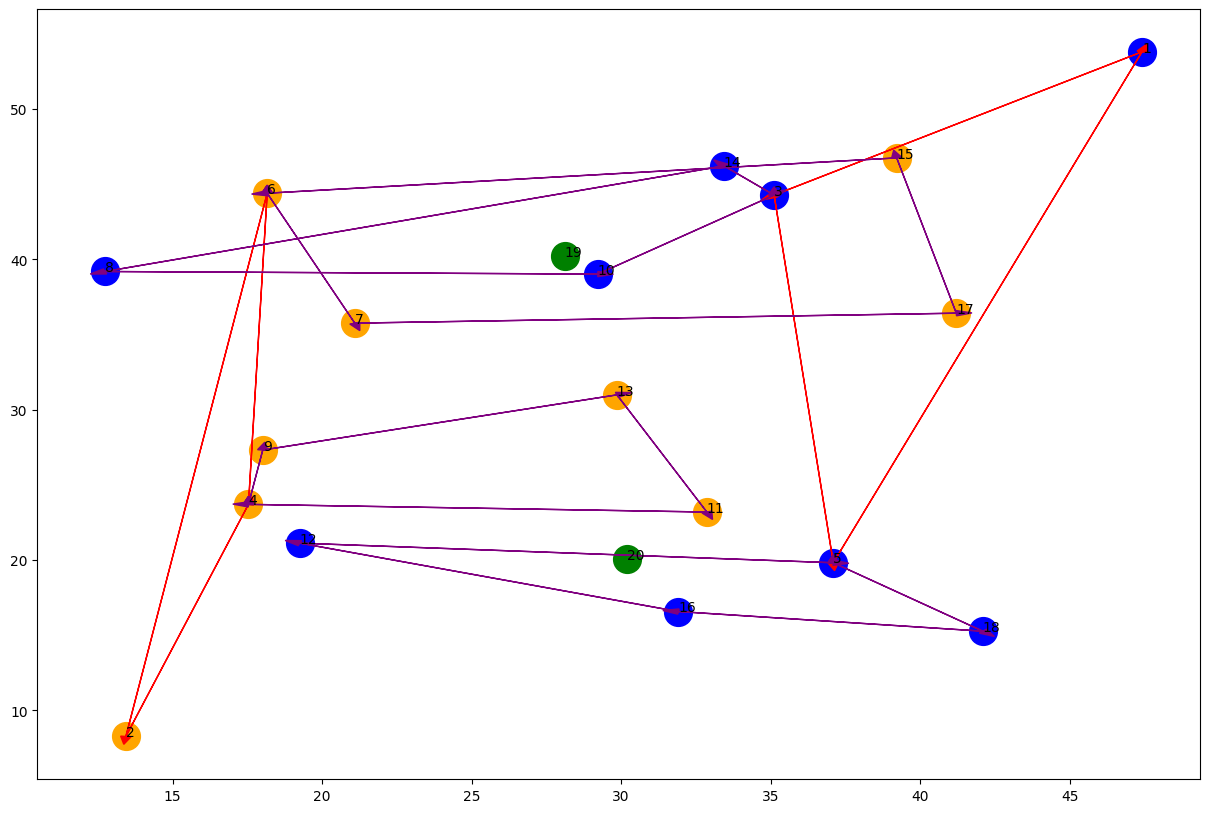

## No Collaboration Approach (Dellaert 19)

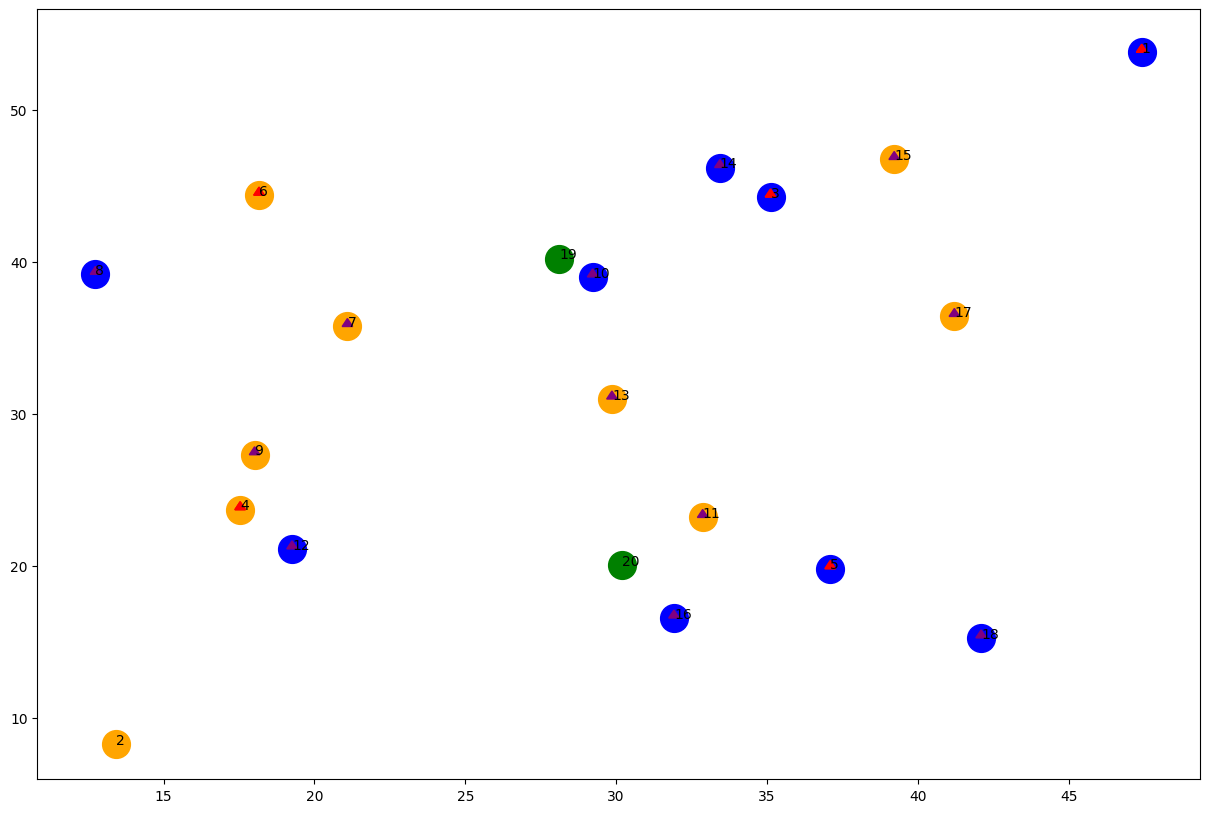

In [6]:
solution_variables_nc = pd.read_excel('solution_NC_d19.xlsx', index_col=0)

route_plot(data, solution_variables_nc)

## Asset Sharing Approach (Dellaert 21)

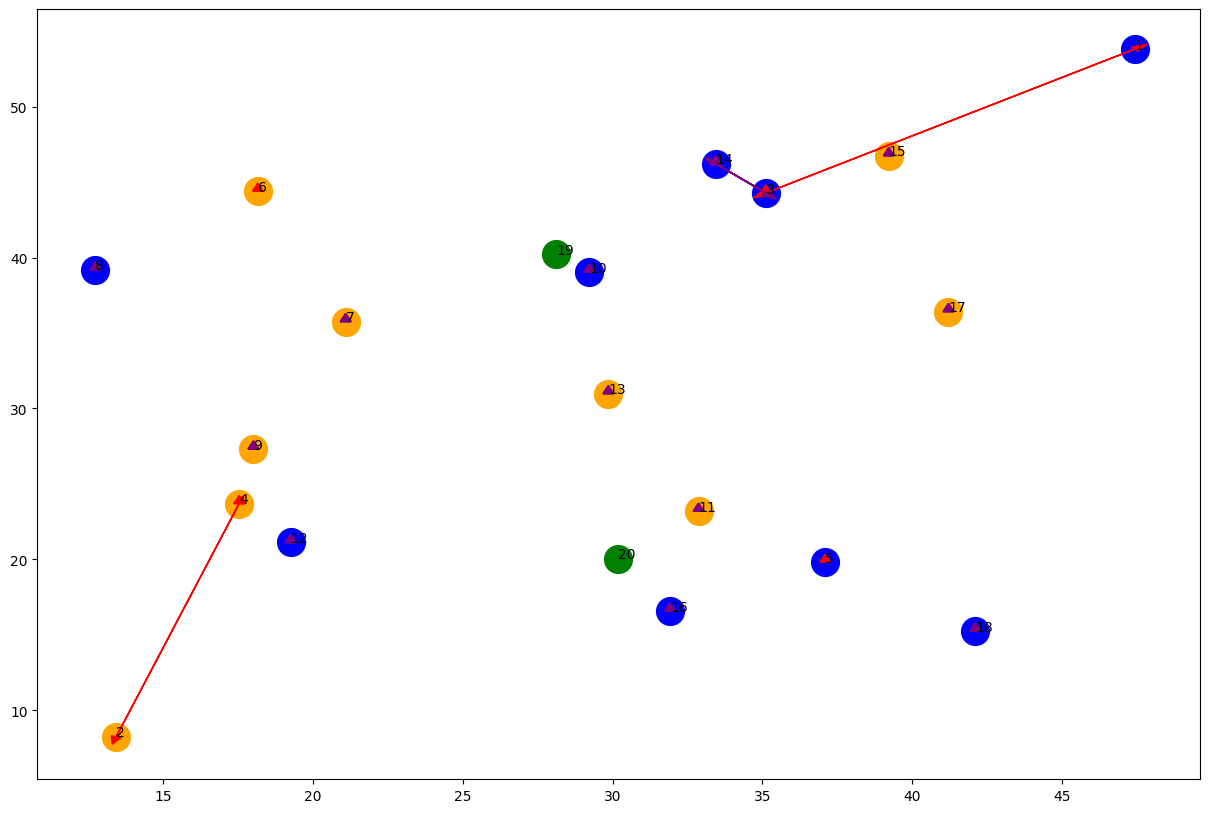

In [7]:
solution_variables_as = pd.read_excel('solution_SA_d21.xlsx', index_col=0)

route_plot(data, solution_variables_as)

## Proposed Approach (Collaboration Points)

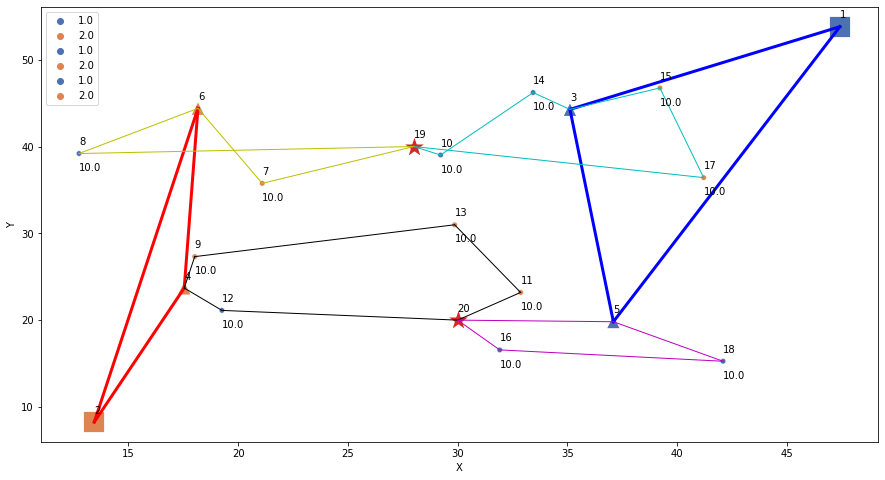